이 파일에서는 Other Plots 부분을 진행합니다.

In [3]:
# 이 블록은 원본에는 존재하지 않는 부분입니다.

import sys
import os

# 경로 추가
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../..')))

In [4]:
import os

gpu_num = ""  # Use "" to use the CPU
os.environ["CUDA_VISIBLE_DEVICES"] = f"{gpu_num}"
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

# Colab does currently not support the latest version of ipython.
# Thus, the preview does not work in Colab. However, whenever possible we
# strongly recommend to use the scene preview mode.
try:  # detect if the notebook runs in Colab
    import google.colab

    colab_compat = True  # deactivate preview
except:
    colab_compat = False

# Allows to exit cell execution in Jupyter
class ExitCell(Exception):
    def _render_traceback_(self):
        pass

import mitsuba as mi
mi.set_variant("llvm_ad_rgb")

# Import Sionna
try:
    import sionna
except ImportError as e:
    # Install Sionna if package is not already installed
    import os

    os.system("pip install sionna")
    import sionna

# Configure the notebook to use only a single GPU and allocate only as much memory as needed
# For more details, see https://www.tensorflow.org/guide/gpu
import tensorflow as tf

gpus = tf.config.list_physical_devices("GPU")
if gpus:
    try:
        tf.config.experimental.set_memory_growth(gpus[0], True)
    except RuntimeError as e:
        print(e)
# Avoid warnings from TensorFlow
tf.get_logger().setLevel("ERROR")

tf.random.set_seed(
    1
)  # Set global random seed for reproducibility

In [5]:
# Import Sionna RT components
import geopandas as gpd
import numpy as np
import numpy.typing
from sionna.rt import load_scene, Transmitter, Receiver, PlanarArray, Camera

from src.classes.BostonTwin import BostonTwin
from pathlib import Path

import geopandas as gpd
import numpy as np
import numpy.typing


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


# BostonTwin

BostonTwin is a dataset that merges a high-fidelity 3D model of the city of Boston, MA, with the existing geospatial data on cellular base stations deployments, in a ray-tracing-ready format. Thus, BostonTwin enables not only the instantaneous rendering and programmatic access to the building models, but it also allows for an accurate representation of the electromagnetic propagation environment in the real-world city of Boston.

## Quickstart

### Initialize and visualize BostonTwin

Create the BostonTwin object by specifying the path of the dataset. The dataset can be downloaded from <http://hdl.handle.net/2047/D20623157>.

In [7]:
# 이 블록은 원본에는 존재하지 않는 부분입니다.

dataset_dir = Path("../../bostontwin/bostontwin")
dataset_dir

PosixPath('../../bostontwin/bostontwin')

In [8]:
# 이 블록은 원본과 다른 변경된 부분입니다.

# dataset_dir = Path("bostontwin")
bostwin = BostonTwin(dataset_dir)

31 scenes imported.


We can get a list of currently available scenes through the `get_scene_names` method.

In [14]:
scene_names = bostwin.get_scene_names()

scene_names.sort()

print(f"There are {len(scene_names)} scenes available in {dataset_dir}.\n{scene_names}")

There are 31 scenes available in ../../bostontwin/bostontwin.
['BOS_F_4', 'BOS_F_5', 'BOS_F_6', 'BOS_F_7', 'BOS_F_8', 'BOS_F_9', 'BOS_G_3', 'BOS_G_4', 'BOS_G_5', 'BOS_G_6', 'BOS_G_7', 'BOS_G_8', 'BOS_G_9', 'BOS_H_3', 'BOS_H_4', 'BOS_H_5', 'BOS_H_6', 'BOS_H_7', 'BOS_H_8', 'BOS_H_9', 'BOS_I_3', 'BOS_I_4', 'BOS_I_5', 'BOS_I_6', 'BOS_I_7', 'BOS_I_8', 'BOS_I_9', 'BOS_J_3', 'BOS_J_5', 'BOS_J_6', 'BOS_J_7']


## Other Plots

In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

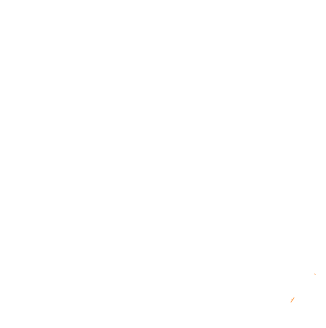

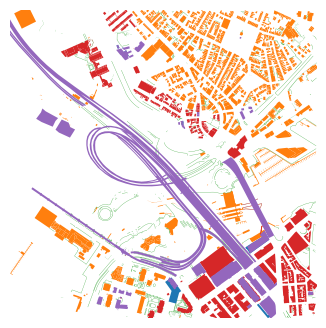

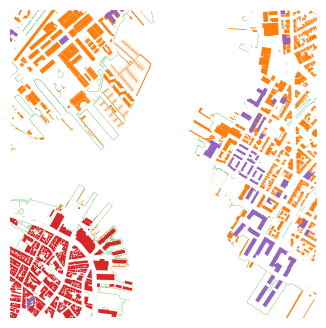

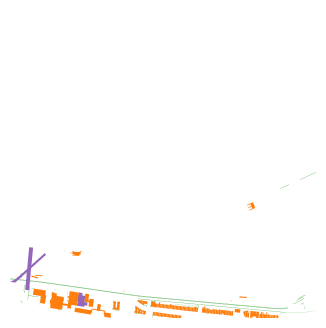

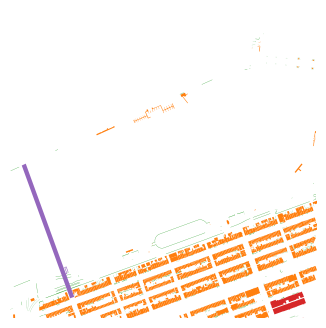

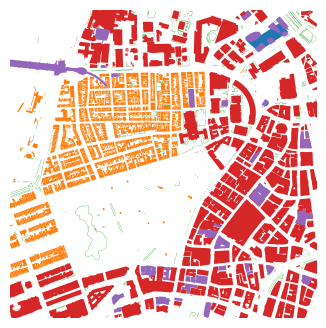

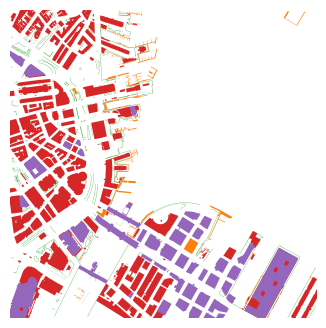

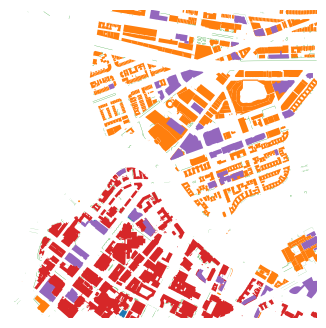

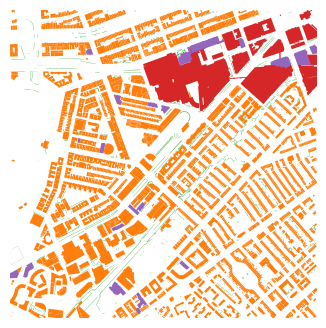

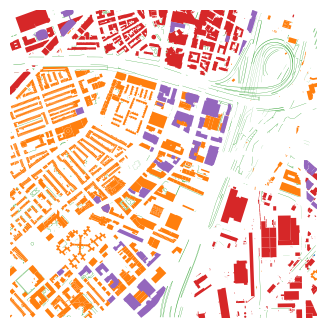

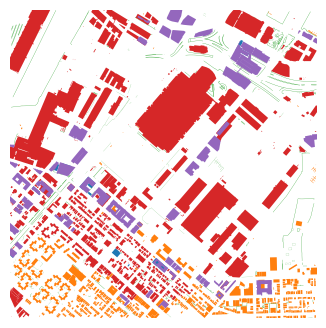

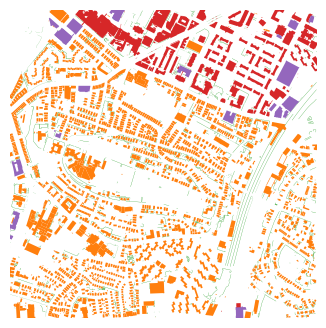

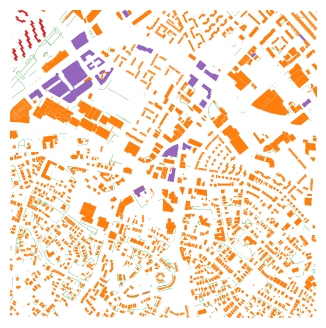

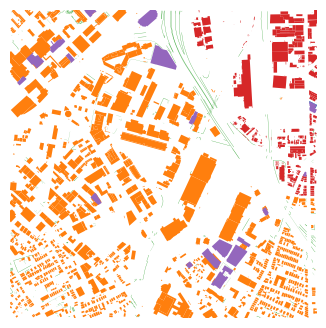

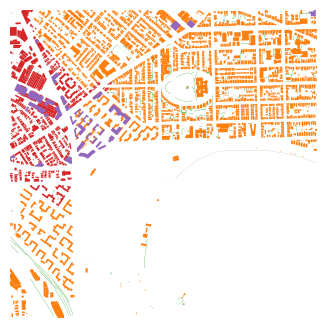

In [10]:
# 이 블록은 원본과 다른 변경된 부분입니다.

col_dict = dict(
    zip(
        [0, 1, 1.5, 2, 3, 3.25, 3.5, 4, 4.5],
        [
            "tab:blue",
            "tab:orange",
            "tab:green",
            "tab:red",
            "tab:purple",
            "tab:brown",
            "tab:pink",
            "tab:gray",
            "tab:olive",
        ],
    )
)
# fig, axs = plt.subplots(4,3,figsize=(9,16))
# plt.figure(figsize=(3, 4))
# gs1 = gridspec.GridSpec(4, 3)
# gs1.update(wspace=0, hspace=0)  # set the spacing between axes.

# for i in range(16):
#    # i = i + 1 # grid spec indexes from 0
#     plt.axis('on')
#     ax1.set_xticklabels([])
#     ax1.set_yticklabels([])
#     ax1.set_aspect('equal')
for ax_idx, scene_name in enumerate(
    [
        # "BOS_F_3",
        "BOS_G_3",
        "BOS_H_3",
        "BOS_I_3",
        "BOS_F_4",
        "BOS_G_4",
        "BOS_H_4",
        "BOS_I_4",
        "BOS_F_5",
        "BOS_G_5",
        "BOS_H_5",
        "BOS_I_5",
        "BOS_F_6",
        "BOS_G_6",
        "BOS_H_6",
        "BOS_I_6",
    ]
):
    fig, curr_ax = plt.subplots(1, 1, figsize=(4, 4))
    tileinfo_gdf = gpd.GeoDataFrame.from_file(
        bostwin.boston_model.tiles_dict[scene_name]["tileinfo_path"]
    )
    x_min, y_min, x_max, y_max = tileinfo_gdf.total_bounds
    gdf = gpd.GeoDataFrame.from_file(
        bostwin.boston_model.tiles_dict[scene_name]["geo_scene_path"]
    )
    for lod, col in col_dict.items():
        # print(np.where(gdf["Model_LOD"]==lod)[0])
        lod_ids = np.where(gdf["Model_LOD"] == lod)[0]
        if lod_ids.size > 0:
            gdf_tmp = gdf.iloc[lod_ids, :]
            gdf_tmp.plot(color=col, ax=curr_ax)
    # plt.axis('on')
    curr_ax.set_xlim([x_min, x_max])
    curr_ax.set_ylim([y_min, y_max])
    curr_ax.set_xticklabels([])
    curr_ax.set_yticklabels([])
    curr_ax.set_axis_off()
    # plt.subplots_adjust(wspace=0, hspace=0)
    # plt.savefig(f"figures/LOD_{scene_name}.png", dpi=190, transparent=True, bbox_inches='tight', )
    plt.savefig(f"LOD_{scene_name}.png", dpi=190, transparent=True, bbox_inches='tight', )

In [15]:
scene_names

['BOS_F_4',
 'BOS_F_5',
 'BOS_F_6',
 'BOS_F_7',
 'BOS_F_8',
 'BOS_F_9',
 'BOS_G_3',
 'BOS_G_4',
 'BOS_G_5',
 'BOS_G_6',
 'BOS_G_7',
 'BOS_G_8',
 'BOS_G_9',
 'BOS_H_3',
 'BOS_H_4',
 'BOS_H_5',
 'BOS_H_6',
 'BOS_H_7',
 'BOS_H_8',
 'BOS_H_9',
 'BOS_I_3',
 'BOS_I_4',
 'BOS_I_5',
 'BOS_I_6',
 'BOS_I_7',
 'BOS_I_8',
 'BOS_I_9',
 'BOS_J_3',
 'BOS_J_5',
 'BOS_J_6',
 'BOS_J_7']

In [16]:
n_models = 0
n_triangles = 0
for scene_name in scene_names:
    gdf = gpd.GeoDataFrame.from_file(bostwin.boston_model.tiles_dict[scene_name]["tileinfo_path"])
    n_models = n_models + gdf["n_models"].values[0]
    n_triangles = n_triangles + gdf["n_triangles"].values[0]
    #row = f'{scene_name} & {gdf["Long"].values[0]} & {gdf["Lat"].values[0]} & {n_models} & {n_triangles}\\\\ \\hline'
    row = f'{scene_name} & {gdf["Lat"].values[0]} & {n_models} & {n_triangles}\\\\ \\hline'
    row = row.replace("_","\\_")
    print(row)
print(f"Total &  &  & {n_models} & {n_triangles} \\\\ \\hline")


BOS\_F\_4 & -71.1025189571 & 181 & 22113\\ \hline
BOS\_F\_5 & -71.1026051428 & 1716 & 221569\\ \hline
BOS\_F\_6 & -71.1026912911 & 5407 & 535179\\ \hline
BOS\_F\_7 & -71.1027774021 & 10224 & 918116\\ \hline
BOS\_F\_8 & -71.1028634758 & 11617 & 1013826\\ \hline
BOS\_F\_9 & -71.1029495121 & 12792 & 1078310\\ \hline
BOS\_G\_3 & -71.0839300113 & 12794 & 1078362\\ \hline
BOS\_G\_4 & -71.0840202471 & 14321 & 1208974\\ \hline
BOS\_G\_5 & -71.0841104437 & 18961 & 1602057\\ \hline
BOS\_G\_6 & -71.0842006013 & 22618 & 1840642\\ \hline
BOS\_G\_7 & -71.0842907198 & 27287 & 2174618\\ \hline
BOS\_G\_8 & -71.0843807992 & 30675 & 2405610\\ \hline
BOS\_G\_9 & -71.0844708396 & 34386 & 2635424\\ \hline
BOS\_H\_3 & -71.0654273276 & 37129 & 2875728\\ \hline
BOS\_H\_4 & -71.0655215761 & 40302 & 3190590\\ \hline
BOS\_H\_5 & -71.0656157838 & 43358 & 3454206\\ \hline
BOS\_H\_6 & -71.0657099505 & 45807 & 3586934\\ \hline
BOS\_H\_7 & -71.0658040765 & 51144 & 3985092\\ \hline
BOS\_H\_8 & -71.0658981616 & 56224 & 

In [17]:
bostwin.boston_model.tiles_dict[scene_name]["tileinfo_path"]

PosixPath('/app/bostontwin/bostontwin/boston3d/BOS_J_7_tileinfo.geojson')

In [18]:
bostwin.boston_model.tiles_dict[scene_name]

{'tileinfo_path': PosixPath('/app/bostontwin/bostontwin/boston3d/BOS_J_7_tileinfo.geojson'),
 'geo_scene_path': PosixPath('../../bostontwin/bostontwin/boston3d/BOS_J_7.geojson'),
 'mi_scene_path': PosixPath('/app/bostontwin/bostontwin/boston3d/BOS_J_7.xml')}

In [20]:
# 이 블록은 원본과 다른 변경된 부분입니다.
# gdf1
gdf

,tile_id,tile_label,town,grid_col,grid_row,town_code,BosShift_X,BosShift_Y,Lat,Lon,...,MASP_Y,Shape_Leng,Shape_Area,Centr_X_Ft,Centr_Y_Ft,Centr_X_m,Centr_Y_m,n_models,n_triangles,geometry
0,BOS_J_7,J-7,None,J,7,BOS,51400,37500,-71.028831,42.31565,...,2940400,19999.99937,2.500000e+07,52500.227609,37496.972456,16002.069375,11429.077205,82,8840,"POLYGON Z ((-71.03812 42.30882 0.00000, -71.01..."
